# RandomForest
#### Axel Wieslander Jansson

* Train and evaluate the model
* What are the most important attributes
* Which classes are the most difficult for the model to classify correctly

* Create your own random forest model
* How does the model that you've created differ from the previous model
* Does the new model have the same classification problems

Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importera dataset to be analyzed

In [2]:
wine_df = pd.read_csv('../../Datasets/WineQT.csv')

Overview of dataset

In [3]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Size of dataset

In [4]:
wine_df.shape

(1143, 13)

Importing RandomForestclassifier + test_train split function. Splitting data into input(X) och output(y)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = wine_df.drop(columns = ['Id', 'quality'])
y = wine_df['quality']

print(f"X:\n{X.head()}\nOutput, y:\n {y.head()}")

X:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4  
Outpu

Creating test + training datasets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 22)

print(f"Test size: {X_test.shape}\nTraining size: {X_train.shape}")

Test size: (343, 11)
Training size: (800, 11)


In [7]:
%%time
clf = RandomForestClassifier(random_state = 22, n_estimators = 100)

clf.fit(X_train, y_train)

Wall time: 302 ms


RandomForestClassifier(random_state=22)

### Testscore of model:

In [8]:
clf.score(X_test, y_test)

0.6705539358600583

In [9]:
clf.n_estimators

100

### Attribute weight modell:
The five most important attributes are:
1. Alchol
2. total sulfur dioxide
3. sulphates
4. volatile acidity
5. density


In [10]:
from operator import itemgetter

feature_values = clf.feature_importances_
feature_names = list(X)
feature_list = []
for i in range(len(feature_names)):
    temp = []
    temp.append(feature_names[i])
    temp.append(feature_values[i])
    feature_list.append(temp)
sorted_list = sorted(feature_list, key=itemgetter(1))
for i in range(len(sorted_list)):
    print(sorted_list[i])

['residual sugar', 0.06541804685471951]
['free sulfur dioxide', 0.06617348727521881]
['fixed acidity', 0.07210142643686988]
['citric acid', 0.07535048158722817]
['chlorides', 0.08150922536076462]
['pH', 0.08229588601623757]
['density', 0.0890996033230491]
['volatile acidity', 0.09787201288240209]
['sulphates', 0.10832507038295443]
['total sulfur dioxide', 0.1099287457414203]
['alcohol', 0.1519260141391358]


### Evaluation of classes.

The model cannot accurately predict the values 3, 4 or 8. There are very few datapoints with these values as output which leads to less opportunities for the model to learn and predict these. Since RandomForest creates multiple decision trees based on sampled training data it is possible that some of the trees do not even see these values as actual outputs and cannot predict them, and since the RandomForestClassifier will predict the most common prediction of the decision trees in the forest, classifying these outliers correctly is unlikely. Some of the trees might not even see these outlying values as options!

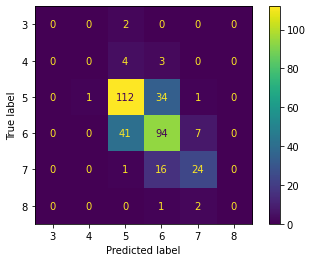

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = clf.predict(X_test)

y_pred_cm = confusion_matrix(y_test,y_pred)
y_pred_cm_display = ConfusionMatrixDisplay(y_pred_cm, display_labels=['3','4','5','6','7','8'])
y_pred_cm_display.plot()


# Creating a RandomForest classifier from decision trees


Amount of quality = 3 in test set: 3
Amount of quality = 8 in test set: 6
Amount of quality = 3 in training set: 3
Amount of quality = 8 in training set: 10

The accuracy of the model is: 0.6370106761565836
Wall time: 838 ms


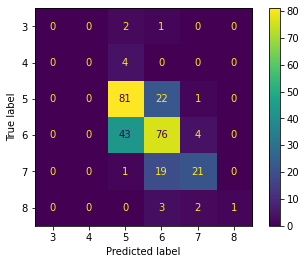

In [12]:
%%time

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random
import time 


n_trees = 100
n_feature_drop = 4
#Creating the classifier for the decision trees
D_t_clf = DecisionTreeClassifier(random_state = 22)

#Splitting into test and train data.
np.random.seed(20)
wine_df['is_train'] = np.random.uniform(0, 1, len(X)) <= 0.75
train_data = wine_df[wine_df['is_train'] == True]
test_data = wine_df[wine_df['is_train'] == False]
train_data = train_data.drop(columns = ['is_train'])
test_data = test_data.drop(columns = ['is_train'])

X_test_data = test_data.drop(columns = ['Id', 'quality'])
y_test_data = test_data['quality']


#Checking in which split(test or train) the extremevalues end up

print(f"Amount of quality = 3 in test set: {y_test_data.value_counts()[3]}")
print(f"Amount of quality = 8 in test set: {y_test_data.value_counts()[8]}")

print(f"Amount of quality = 3 in training set: {train_data['quality'].value_counts()[3]}")
print(f"Amount of quality = 8 in training set: {train_data['quality'].value_counts()[8]}")
#Creating the "RandomForest".
def createRandomForest(n_trees:int, sample_frac:int, n_features_to_drop:int) -> list:
    prediction_list = []
    for i in range(n_trees):
        
        #Creating new testdata to be used in the decision trees based on the original testdata
        #replace = True allows for duplicate entries to be added to the new testdata

        df_split = train_data.sample(frac = sample_frac, replace = True)
        X_dt = df_split.drop(columns = ['Id','quality'])
        y_dt = df_split['quality']
        
        #Dropping a set number of features from the dataset.
        #The random seed generates new random features each loop (can be the same in different order, but the dataset they affect on will differ)
        random.seed(i)
        params_to_remove = random.sample(list(X_dt), k = n_features_to_drop)
        X_dt = X_dt.drop(columns = params_to_remove)
        X_test_data_dt = X_test_data.drop(columns = params_to_remove)
        
        #Creating the model
        D_t_clf.fit(X_dt,y_dt)
        #Creating a list of all predictions for each Test value
        predictions = D_t_clf.predict(X_test_data_dt)
        prediction_list.append(predictions)

    return prediction_list


def getAccuracy(predictions:list, y_test:list):

    correct_pred = ((predictions == y_test).sum())
    accuracy = correct_pred/len(y_test)
    return accuracy
    
#Finding the most common prediction    
def mostCommonPredictionArray(predictions):
    predicts = np.stack(predictions,axis = 0)
    most_common_prediction = []
    for i in range(len(predicts[0])):
        occurences = []
        for j in range(len(predicts)):
            occurences.append(predicts[j][i])
            
        most_common_value = np.bincount(occurences).argmax()
        most_common_prediction.append(most_common_value)
         
    return most_common_prediction

def confusionMatrix(prediction,y_test):
    create_cm = confusion_matrix(y_test,prediction)
    y_pred_cm_display = ConfusionMatrixDisplay(create_cm, display_labels=['3','4','5','6','7','8'])
    y_pred_cm_display.plot()
    
#Create RandomForest model
predictions = createRandomForest(n_trees, 0.7, n_feature_drop)

y_test_data = y_test_data.array
prediction_new = mostCommonPredictionArray(predictions)

accuracy = getAccuracy(prediction_new,y_test_data)
print(f"\nThe accuracy of the model is: {accuracy}")

confusionMatrix(prediction_new,y_test_data)

# Moving all extreme values to the trainingdata


Gives a better score since these are the most difficult to classify 

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075  

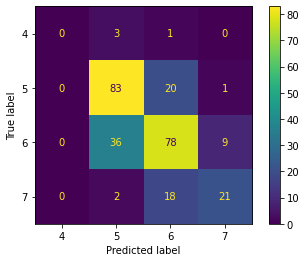

In [33]:
%%time

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random
import time 


n_trees = 100
n_feature_drop = 4

D_t_clf = DecisionTreeClassifier(random_state = 22)


np.random.seed(20)
wine_df['is_train'] = np.random.uniform(0, 1, len(X)) <= 0.75
train_data = wine_df[(wine_df['is_train'] == True) | (wine_df['quality'] == 3) | (wine_df['quality'] == 8)]
test_data = wine_df[(wine_df['is_train'] == False) & (wine_df['quality'] != 3) & (wine_df['quality'] != 8)]

print(wine_df.head)
train_data = train_data.drop(columns = ['is_train'])
test_data = test_data.drop(columns = ['is_train'])

X_test_data = test_data.drop(columns = ['Id', 'quality'])
y_test_data = test_data['quality']



print(f"Amount of quality = 3 in training set: {train_data['quality'].value_counts()[3]}")
print(f"Amount of quality = 8 in training set: {train_data['quality'].value_counts()[8]}")

def createRandomForest(n_trees:int, sample_frac:int, n_features_to_drop:int) -> list:
    prediction_list = []
    for i in range(n_trees):
        

        
        df_split = train_data.sample(frac = sample_frac, replace = True)
        X_dt = df_split.drop(columns = ['Id','quality'])
        y_dt = df_split['quality']
        

        random.seed(i)
        params_to_remove = random.sample(list(X_dt), k = n_features_to_drop)
        X_dt = X_dt.drop(columns = params_to_remove)
        X_test_data_dt = X_test_data.drop(columns = params_to_remove)
        

        D_t_clf.fit(X_dt,y_dt)

        predictions = D_t_clf.predict(X_test_data_dt)
        prediction_list.append(predictions)

    return prediction_list


def getAccuracy(predictions:list, y_test:list):

    correct_pred = ((predictions == y_test).sum())
    accuracy = correct_pred/len(y_test)
    return accuracy
    
def mostCommonPredictionArray(predictions):
    predicts = np.stack(predictions,axis = 0)
    most_common_prediction = []
    for i in range(len(predicts[0])):
        occurences = []
        for j in range(len(predicts)):
            occurences.append(predicts[j][i])
            
        most_common_value = np.bincount(occurences).argmax()
        most_common_prediction.append(most_common_value)
         
    return most_common_prediction

def confusionMatrix(prediction,y_test):
    create_cm = confusion_matrix(y_test,prediction)
    y_pred_cm_display = ConfusionMatrixDisplay(create_cm, display_labels=['4','5','6','7'])
    y_pred_cm_display.plot()
    

predictions = createRandomForest(n_trees, 0.7, n_feature_drop)


y_test_data = y_test_data.array
prediction_new = mostCommonPredictionArray(predictions)

accuracy = getAccuracy(prediction_new,y_test_data)
print(f"\nThe accuracy of the model is: {accuracy}")

confusionMatrix(prediction_new,y_test_data)

# Finding the best  testscore:

Demonstration of the impact of random seed.
By looping through random seed 0-100 a test score of 0.7313915857605178, is found at random seed 99 when wine_df[train] = 0.75 and  n_features_drop = 7


In [86]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random
import time 


n_trees = 1000
n_feature_drop = 7


D_t_clf = DecisionTreeClassifier(random_state = 22)


for k in range(100):
    np.random.seed(k)
    wine_df['is_train'] = np.random.uniform(0, 1, len(X)) <= 0.75
    train_data = wine_df[wine_df['is_train'] == True]
    test_data = wine_df[wine_df['is_train'] == False]
    train_data = train_data.drop(columns = ['is_train'])
    test_data = test_data.drop(columns = ['is_train'])

    X_test_data = test_data.drop(columns = ['Id', 'quality'])
    y_test_data = test_data['quality']

    print(X_test_data.shape)

    def createRandomForest(n_trees:int, sample_frac:int, n_features_to_drop:int) -> list:
        prediction_list = []
        for i in range(n_trees):



            df_split = train_data.sample(frac = sample_frac, replace = True)
            X_dt = df_split.drop(columns = ['Id','quality'])
            y_dt = df_split['quality']

            random.seed(i)
            params_to_remove = random.sample(list(X_dt), k = n_features_to_drop)


            X_dt = X_dt.drop(columns = params_to_remove)
            X_test_data_dt = X_test_data.drop(columns = params_to_remove)
            

            D_t_clf.fit(X_dt,y_dt)

            predictions = D_t_clf.predict(X_test_data_dt)
            prediction_list.append(predictions)

        return prediction_list


    def getAccuracy(predictions:list, y_test:list):
        correct_pred = ((predictions == y_test).sum())
        accuracy = correct_pred/len(y_test)
        return accuracy

    def mostCommonPredictionArray(predictions):
        predicts = np.stack(predictions,axis = 0)
        most_common_prediction = []
        for i in range(len(predicts[0])):
            occurences = []
            for j in range(len(predicts)):
                occurences.append(predicts[j][i])

            most_common_value = np.bincount(occurences).argmax()
            most_common_prediction.append(most_common_value)

        return most_common_prediction

    def confusionMatrix(prediction,y_test):
        create_cm = confusion_matrix(y_test,prediction)
        y_pred_cm_display = ConfusionMatrixDisplay(create_cm, display_labels=['3','4','5','6','7','8'])
        y_pred_cm_display.plot()


    predictions = createRandomForest(n_trees, 0.7, 4)

    y_test_data = y_test_data.array
    prediction_new = mostCommonPredictionArray(predictions)

    accuracy = getAccuracy(prediction_new,y_test_data)
    if accuracy > 0.7:
        print(f"\nThe accuracy of the model is: {accuracy}")
        print(f"k: {k}")



(279, 11)
(295, 11)
(261, 11)
(261, 11)
(297, 11)
(279, 11)
(293, 11)
(289, 11)
(276, 11)
(272, 11)
(295, 11)
(295, 11)
(295, 11)
(287, 11)
(272, 11)
(284, 11)
(260, 11)
(280, 11)
(271, 11)
(269, 11)
(281, 11)
(297, 11)
(266, 11)
(269, 11)
(298, 11)
(309, 11)
(302, 11)
(276, 11)
(293, 11)
(283, 11)
(295, 11)
(281, 11)
(296, 11)
(304, 11)

The accuracy of the model is: 0.7171052631578947
k: 33
(280, 11)

The accuracy of the model is: 0.7035714285714286
k: 34
(297, 11)
(255, 11)
(275, 11)
(280, 11)
(299, 11)
(292, 11)
(276, 11)
(288, 11)
(294, 11)
(286, 11)
(278, 11)

The accuracy of the model is: 0.7122302158273381
k: 45
(288, 11)

The accuracy of the model is: 0.7013888888888888
k: 46
(309, 11)
(274, 11)
(291, 11)
(269, 11)
(285, 11)
(310, 11)
(253, 11)
(255, 11)
(264, 11)

The accuracy of the model is: 0.7234848484848485
k: 55
(291, 11)
(270, 11)
(267, 11)
(273, 11)
(252, 11)
(279, 11)
(276, 11)
(289, 11)
(255, 11)
(257, 11)
(264, 11)
(284, 11)
(299, 11)
(268, 11)
(307, 11)
(293, 11)


# Model using K-folds


Creates a more realistic model. The data is in this case split into 5-parts where 1 of these is the testset and the remaining 4 are the training data. The model will go through this 5-part split and change the split that is set as the testdata and those that are set to trainingdata until all parts have been set to testdata, and the evaluation of the modelperformance are based on the score produced by these 5 parts.

Imageexplanation:
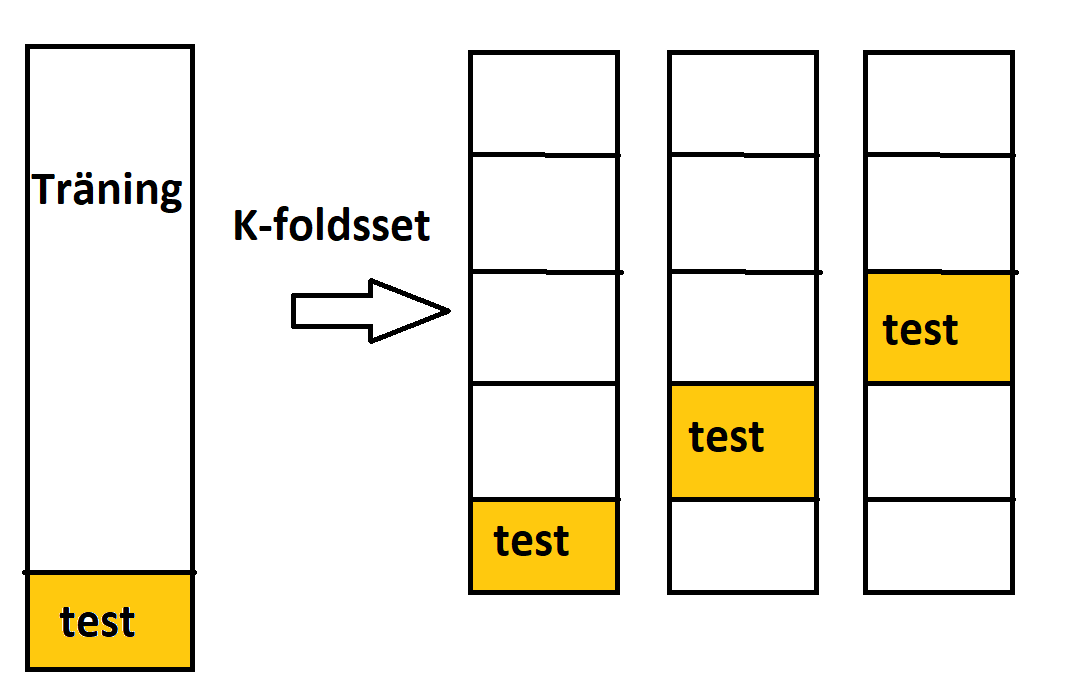

The accuracy after k-folds stuff:0.6690391459074733


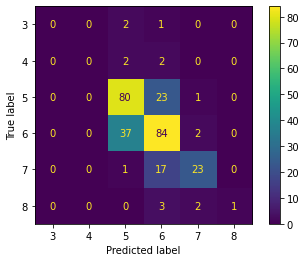

<Figure size 432x288 with 0 Axes>

In [50]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random
import time 


n_trees = 100
n_feature_drop = 4

D_t_clf = DecisionTreeClassifier(random_state = 22)


np.random.seed(20)
wine_df['is_train'] = np.random.uniform(0, 1, len(X)) <= 0.75
train_data = wine_df[wine_df['is_train'] == True]
test_data = wine_df[wine_df['is_train'] == False]
train_data = train_data.drop(columns = ['is_train'])
test_data = test_data.drop(columns = ['is_train'])

X_test_data = test_data.drop(columns = ['Id', 'quality'])
y_test_data = test_data['quality']

kf = KFold(n_splits = 5)

def createRandomForest(train_data, test_data ,n_trees:int, sample_frac:int, n_features_to_drop:int) -> list:
    prediction_list = []
    
    for i in range(n_trees):
        

        
        df_split = train_data.sample(frac = sample_frac, replace = True)
        X_dt = df_split.drop(columns = ['Id','quality'])
        y_dt = df_split['quality']

        random.seed(i)
        params_to_remove = random.sample(list(X_dt), k = n_features_to_drop)
        
        X_dt = X_dt.drop(columns = params_to_remove)
        X_test_data_dt = X_test_data.drop(columns = params_to_remove)
        

        D_t_clf.fit(X_dt,y_dt)

        predictions = D_t_clf.predict(X_test_data_dt)
        prediction_list.append(predictions)
    return prediction_list


def getAccuracy(predictions:list, y_test:list):

    correct_pred = ((predictions == y_test).sum())
    accuracy = correct_pred/len(y_test)
    return accuracy
    
def mostCommonPredictionArray(predictions):
    predicts = np.stack(predictions,axis = 0)
    most_common_prediction = []
    for i in range(len(predicts[0])):
        occurences = []
        for j in range(len(predicts)):
            occurences.append(predicts[j][i])
            
        most_common_value = np.bincount(occurences).argmax()
        most_common_prediction.append(most_common_value)
         
    return most_common_prediction

def confusionMatrix(prediction,y_test):
    create_cm = confusion_matrix(y_test,prediction)
    y_pred_cm_display = ConfusionMatrixDisplay(create_cm, display_labels=['3','4','5','6','7','8'])
    y_pred_cm_display.plot()
    plt.figure()
    


y_test_data = y_test_data.array

k_folds_predictions = []

for train_index, test_index in kf.split(train_data):
    new_train_data = train_data.iloc[train_index]
    new_test_data = train_data.iloc[test_index]
    predictions = createRandomForest(new_train_data,new_test_data,n_trees, 0.7, n_feature_drop)
    prediction_new = mostCommonPredictionArray(predictions)
    k_folds_predictions.append(prediction_new)
    
k_folds_prediction =(np.mean(k_folds_predictions,axis = 0).round())
k_folds_accuracy = getAccuracy(k_folds_prediction,y_test_data)

print(f"The accuracy after k-folds stuff:{k_folds_accuracy}")

confusionMatrix(k_folds_prediction,y_test_data)